In [11]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

In [12]:
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
class TwitterScrapy(object):
    # generic Twitter class for sentiment analysis
    def __init__(self):
        '''
        Initialization method
        '''
        # keys and tokens from the twitter by Develop
        consumer_key="FQ3a8h71Jq11VCjfVDQ6UYCKI"
        consumer_secret="GAzPIQ01qWu7UKsLlKY41uCRBNi3ACeeh0Lpuwe01FfMltX08G"
        access_token="971597583595528192-cDv1Fa5GxIXBxyK5HiDHbuGLGGXF4r5"
        access_token_secret="dde00dIexPjC5EaVgYw0HZeDsipvLv26S4ZPCgDL1hp9n"
        # attempt authentation
        try:
            self.auth=OAuthHandler(consumer_key, consumer_secret)
            self.auth.set_access_token(access_token,access_token_secret)
            self.api=tweepy.API(self.auth) 
        except:
            print ("Error:Authentation Failed")    
    def clean_tweet(self,tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    def get_tweet_sentiment(self,tweet):
        analysis=TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity>0:
            return 'positive'
        elif analysis.sentiment.polarity==0:
            return 'netural'
        else:
            return 'negative'
    def get_tweets(self,query,count=10):
        # create an empty list to store parsed tweets
        tweets=[]        
        try:
        # call api to fetch tweets
            fetched_tweets=self.api.search(q=query,count=count)
        # use for loop to parse tweets one by one
            for tweet in fetched_tweets:
                parsed_tweet={}
                parsed_tweet['text']=tweet.text
                parsed_tweet['sentiment']=self.get_tweet_sentiment(tweet.text)
                if tweet.retweet_count>0:
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
            return tweets
        except tweepy.TweepError as e:
            print("Error:"+str(e))

In [14]:
api=TwitterScrapy()
# call function to get tweets 
tweets=api.get_tweets(query="S&P 500",count=10000)
# create a list to restore the positive
ptweets=[tweet for tweet in tweets if tweet['sentiment']=='positive']
ntweets=[tweet for tweet in tweets if tweet['sentiment']=='negative']
ppercent=len(ptweets)/len(tweets)
npercent=len(ntweets)/len(tweets)
print(len(ptweets))
print(len(ntweets))
print(len(tweets))
print ("The positive tweet percentage towards S&P 500 is"+" "+str(round(ppercent,2)))
print ("The negative tweet percentage towards S&P 500 is"+" "+str(round(npercent,2)))

12
3
47
The positive tweet percentage towards S&P 500 is 0.26
The negative tweet percentage towards S&P 500 is 0.06


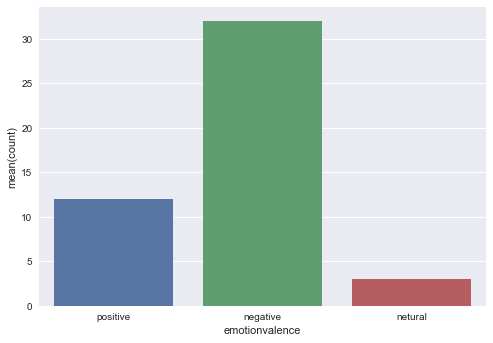

In [17]:
d = {'emotionvalence': ['positive', 'negative','netural'], 'count': [12, 32, 3]}
df=pd.DataFrame(d)
ax = sbn.barplot(x="emotionvalence", y="count", data=df)
plt.show()

In [18]:
for tweet in ptweets[:3]:
    print (tweet['text'])

RT @mebi31: A show that brings my always busy family together 4 dinner at 10 #Ishqbaaaz. A big congo to the whole whole team on completing…
RT @Redpill_Awakens: This was one of Q';s original posts.
This spells out that the Marine Corps will be used in unison with the National Gu…
'S&amp;P 500 Edges Higher After Trump Nomination.


In [19]:
for tweet in ntweets[:3]:
    print (tweet['text'])

@helocruz @hbredda @marcus_steffen Talvez isso ocorra mais nos mercados maduros. Nos EUA, com certeza. Small Cap 60… https://t.co/69qwaOWZSU
500!!! It’s not much, but we did it the ol’ fashioned way. (Sorry 🤖s) #thankYOU fam! @ Denver,… https://t.co/B1UWEOxwZa
SATURDAY MARCH 24 it’s going down again #snapchatsaturdays at knockouts404 THIS TIME WITH A $500… https://t.co/70kAVLzXpK


In [20]:
api=TwitterScrapy()
# call function to get tweets 
tweets=api.get_tweets(query="stock",count=10000)
# create a list to restore the positive
ptweets=[tweet for tweet in tweets if tweet['sentiment']=='positive']
ntweets=[tweet for tweet in tweets if tweet['sentiment']=='negative']
ppercent=len(ptweets)/len(tweets)
npercent=len(ntweets)/len(tweets)
print(len(ptweets))
print(len(ntweets))
print(len(tweets))
print ("The positive tweet percentage towards stock is"+" "+str(round(ppercent,2)))
print ("The negative tweet percentage towards stock is"+" "+str(round(npercent,2)))

19
8
52
The positive tweet percentage towards stock is 0.37
The negative tweet percentage towards stock is 0.15


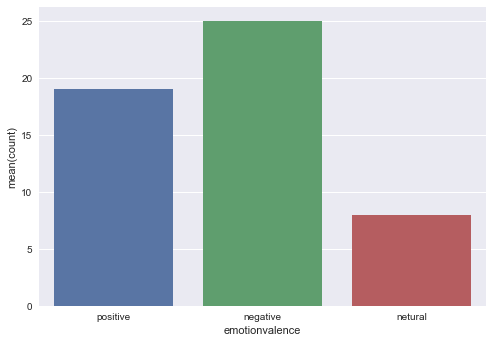

In [21]:
d = {'emotionvalence': ['positive', 'negative','netural'], 'count': [19, 25, 8]}
df=pd.DataFrame(d)
ax = sbn.barplot(x="emotionvalence", y="count", data=df)
plt.show()

In [22]:
for tweet in ptweets[:3]:
    print (tweet['text'])

RT @AsteadWesley: Wow: "Paul Ryan, Mitt Romney’s vice-presidential running mate, sold stock in US banks on the same day he attended a confi…
Idea for original movie scene: 

Char #1 is firing a gun/bow at target while talking to Char #2

Char #1 keeps miss… https://t.co/vwlDHFYT7V
RT @AFP: There has been no public North Korean response to President Trump in the nearly two weeks since he stunned the world by agreeing t…


In [23]:
for tweet in ntweets[:3]:
    print (tweet['text'])

Stock Market Talkz • Re: Weekly Change in Foreign Shareholdings of Selected Counters https://t.co/xj6ukPLTYJ
RT @mitchellvii: We were warned that the Trump tariffs would collapse the stock market. Still waiting on that along with all the other lies…
Sad that I couldn’t use my extra 10% off in store only coupon at @SportChek this weekend since all stores around me… https://t.co/SgTIQeJimc
